# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering


**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.

In [19]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns

# Loading the dataset
penguins_df = pd.read_csv("data/penguins.csv")

# Data presentation and cleaning

In [20]:
#print(penguins_df.shape)
#print(penguins_df.isna().sum())

print(penguins_df.info())

print(penguins_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6    

### Remove missing values and outliers

In [21]:
penguins_clean = penguins_df.dropna()

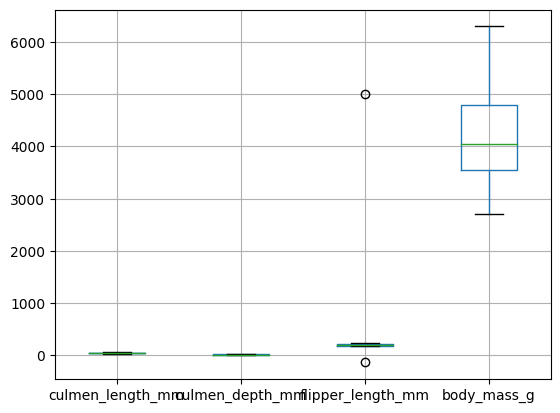

In [22]:
penguins_clean.boxplot()  
plt.show()

In [23]:
print(penguins_clean[penguins_clean['flipper_length_mm']>4000]) 
print(penguins_clean[penguins_clean['flipper_length_mm']<0])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


In [24]:
penguins_clean.drop([9, 14], inplace = True)



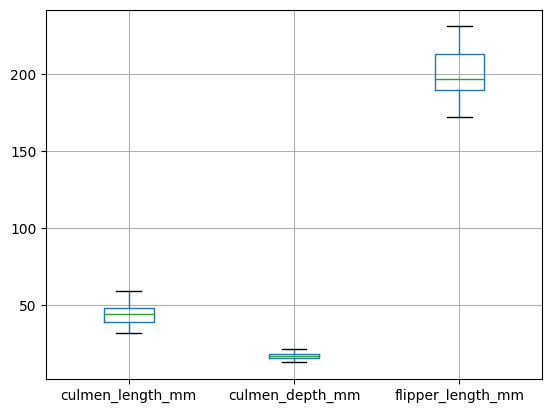

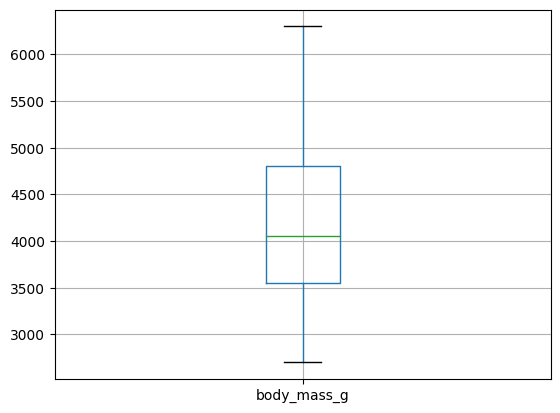

In [25]:
penguins_clean.drop(columns = ['body_mass_g']).boxplot()  
plt.show()

penguins_clean[['body_mass_g']].boxplot()  
plt.show()

# Data preprocessing

- Transform the 'sex' column to two Male/Female columns
- scale the data

In [26]:
penguins_dummies = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)

scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_dummies)
penguins_preprocessed = pd.DataFrame(data = penguins_scaled, columns = penguins_dummies.columns)

print(penguins_preprocessed.head(10))

   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0         -0.905520         0.793126  ...   -0.991031  0.997001
1         -0.831938         0.128503  ...    1.009050 -1.003008
2         -0.684775         0.435252  ...    1.009050 -1.003008
3         -1.347011         1.099875  ...    1.009050 -1.003008
4         -0.868729         1.764498  ...   -0.991031  0.997001
5         -0.942311         0.333002  ...    1.009050 -1.003008
6         -0.887125         1.253249  ...   -0.991031  0.997001
7         -0.537611         0.230753  ...    1.009050 -1.003008
8         -0.997497         2.071247  ...   -0.991031  0.997001
9         -1.365406         0.333002  ...    1.009050 -1.003008

[10 rows x 6 columns]


# Principal component analysis (PCA)

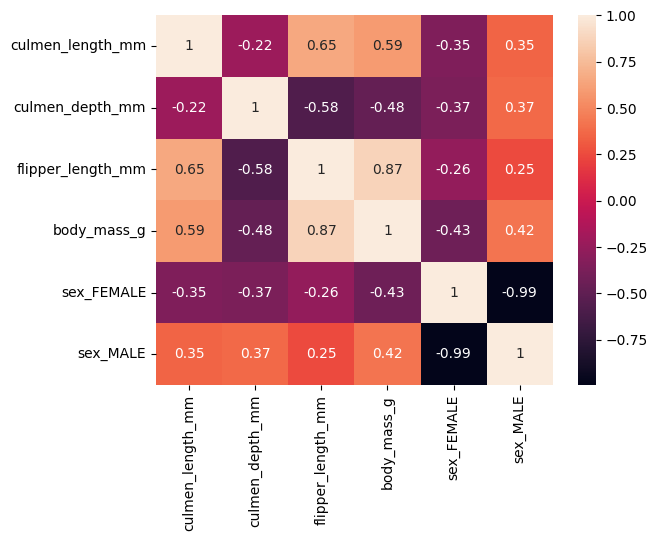

In [27]:
sns.heatmap(penguins_preprocessed.corr(), annot = True)
plt.show()

In [28]:
pca = PCA(n_components=None)

ratios = pca.fit(penguins_preprocessed).explained_variance_ratio_
n_components = sum(ratios > 0.1)
print(n_components)

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)


2


# Clustering

- determine number of clusters
- create and visualise model
- add results to dataframe

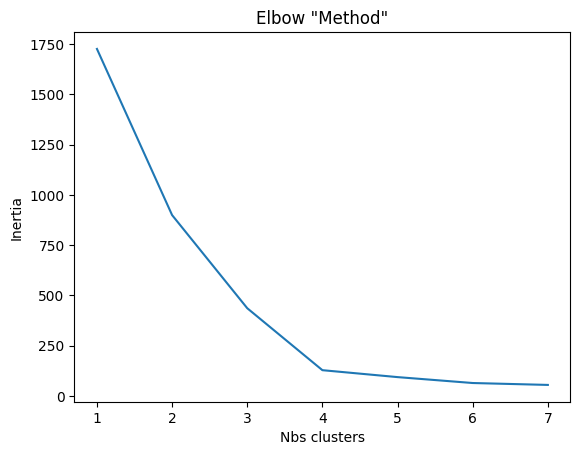

In [29]:
inert = []

for i in range(1,8):
    mean = KMeans(n_clusters = i, random_state = 42).fit(penguins_PCA)
    inert.append(mean.inertia_)

plt.plot(range(1,8), inert)
plt.xlabel('Nbs clusters')
plt.ylabel('Inertia')
plt.title('Elbow "Method"')
plt.show()

    

Following the elbow "method", we use 4 clusters

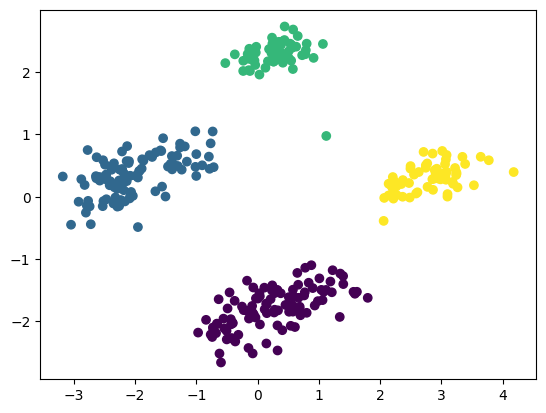

In [30]:
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c = kmeans.labels_)
plt.show()


In [31]:
penguins_clean['label'] = kmeans.labels_
stat_penguins = penguins_clean[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']].groupby('label').mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             40.217757        17.611215         189.046729
2             45.545763        14.262712         212.779661
3             49.473770        15.718033         221.540984
